In [46]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [47]:

df = pd.read_csv("Data/instagram_data.csv")
df.isnull().sum()  # Check missing values
df.fillna(0, inplace=True)  # Replace NaNs with 0 if applicable

In [48]:
print(df.head())

          user_id          name posts followers following    PVT  \
0  abagael.taylor      Abagael💐    42     1,813     1,540  False   
1      abagael___          abby     1         4         4  False   
2        apbagael       Abagael     8        46       207  False   
3       knabagael       Abagael    20        87       408  False   
4        artagael  Abagael West    20       112       291  False   

    date_joined  former_usernames  
0  January 2019               1.0  
1      May 2015               0.0  
2     July 2024               1.0  
3  October 2023               1.0  
4   August 2017               0.0  


In [49]:
df['date_joined'] = pd.to_datetime(df['date_joined'].astype(str) + "-01", format="%B %Y-%d", errors='coerce')
df['account_age'] = (pd.Timestamp.now() - df['date_joined']).dt.days

In [50]:
print(df.head())

          user_id          name posts followers following    PVT date_joined  \
0  abagael.taylor      Abagael💐    42     1,813     1,540  False  2019-01-01   
1      abagael___          abby     1         4         4  False  2015-05-01   
2        apbagael       Abagael     8        46       207  False  2024-07-01   
3       knabagael       Abagael    20        87       408  False  2023-10-01   
4        artagael  Abagael West    20       112       291  False  2017-08-01   

   former_usernames  account_age  
0               1.0       2227.0  
1               0.0       3568.0  
2               1.0        219.0  
3               1.0        493.0  
4               0.0       2745.0  


In [51]:
### **Step 2: Convert 'followers' and 'following' to Integers**
def convert_k_notation(value):
    if pd.isna(value):
        return 0
    value = str(value).replace(',', '')
    value = str(value).replace('.', '')
    if 'K' in value:
        return int(float(value.replace('K', '')) * 1000)
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1000000)
    return int(value)

df['followers'] = df['followers'].apply(convert_k_notation)
df['following'] = df['following'].apply(convert_k_notation)

### **Step 3: Convert Private/Public (PVT) to Binary**
df['PVT'] = df['PVT'].astype(bool).astype(int)  # False → 0 (Public), True → 1 (Private)

### **Step 4: Convert 'former_usernames' to Count**
df['former_usernames'] = df['former_usernames'].fillna(0).astype(str).apply(lambda x: len(x.split(',')) if x != '0' else 0)

# Engagement Ratio
df['engagement_ratio'] = df['followers'] / df['following']

# Display processed data
print(df.head())

          user_id          name posts  followers  following  PVT date_joined  \
0  abagael.taylor      Abagael💐    42       1813       1540    0  2019-01-01   
1      abagael___          abby     1          4          4    0  2015-05-01   
2        apbagael       Abagael     8         46        207    0  2024-07-01   
3       knabagael       Abagael    20         87        408    0  2023-10-01   
4        artagael  Abagael West    20        112        291    0  2017-08-01   

   former_usernames  account_age  engagement_ratio  
0                 1       2227.0          1.177273  
1                 1       3568.0          1.000000  
2                 1        219.0          0.222222  
3                 1        493.0          0.213235  
4                 1       2745.0          0.384880  


In [ ]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Select string (categorical) columns
string_df = df.select_dtypes(include=[object])

# Display the first few rows of each DataFrame
print("Numeric DataFrame:")
print(numeric_df.head())

print("\nString DataFrame:")
print(string_df.head())

Numeric DataFrame:
   followers  following  PVT  former_usernames  account_age  engagement_ratio
0       1813       1540    0                 1       2227.0          1.177273
1          4          4    0                 1       3568.0          1.000000
2         46        207    0                 1        219.0          0.222222
3         87        408    0                 1        493.0          0.213235
4        112        291    0                 1       2745.0          0.384880

String DataFrame:
          user_id          name posts
0  abagael.taylor      Abagael💐    42
1      abagael___          abby     1
2        apbagael       Abagael     8
3       knabagael       Abagael    20
4        artagael  Abagael West    20


In [64]:
print(numeric_df.mean())
print(numeric_df.median())


followers           152510.459184
following              540.198980
PVT                      0.161565
former_usernames         1.000000
account_age           2358.510204
engagement_ratio       361.624950
dtype: float64


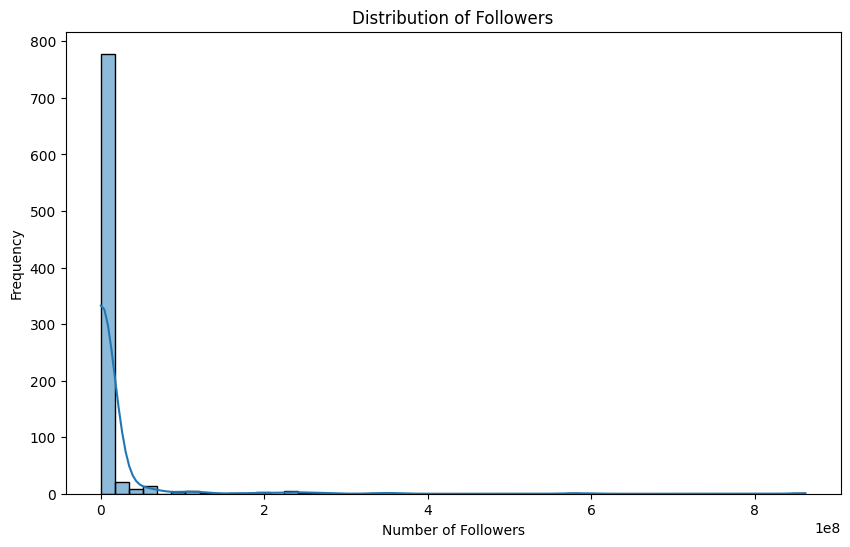

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=50, kde=True)
plt.title('Distribution of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

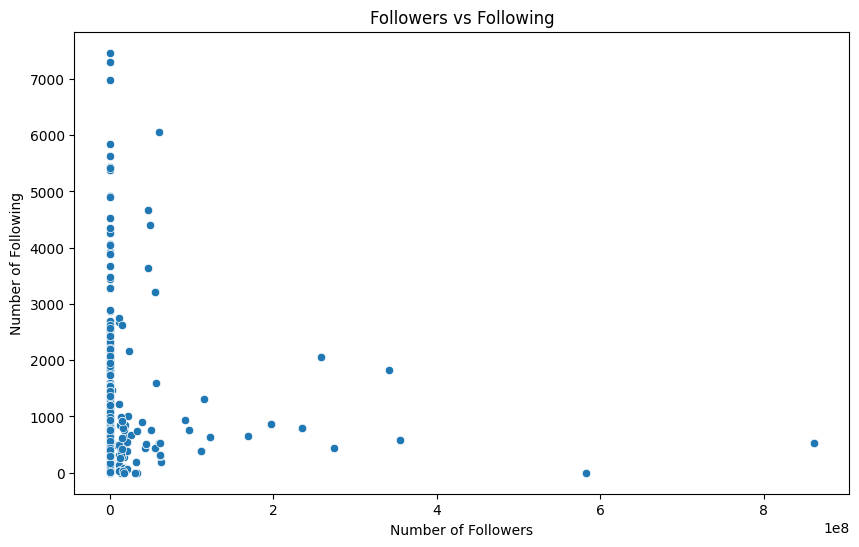

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='followers', y='following', data=df)
plt.title('Followers vs Following')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Following')
plt.show()

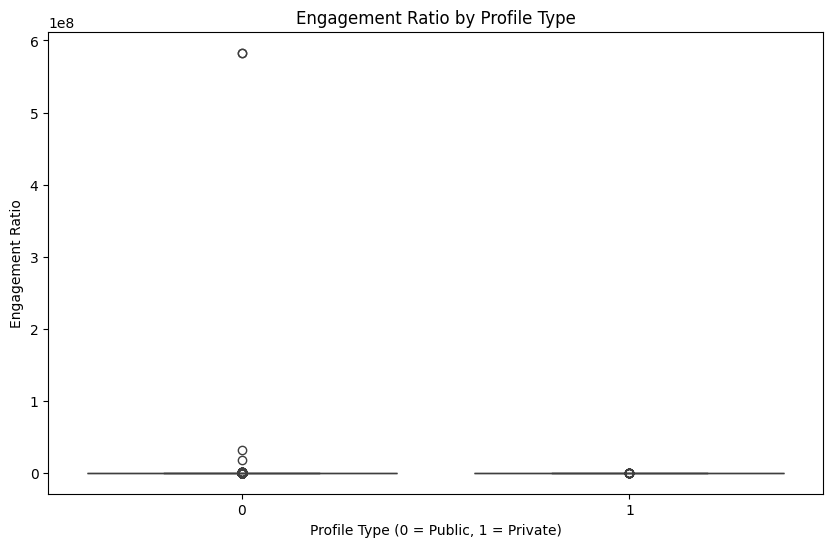

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PVT', y='engagement_ratio', data=df)
plt.title('Engagement Ratio by Profile Type')
plt.xlabel('Profile Type (0 = Public, 1 = Private)')
plt.ylabel('Engagement Ratio')
plt.show()

In [56]:
# Find the account with the highest engagement ratio
highest_engagement_account = df.loc[df['engagement_ratio'].idxmax()]

print("Account with the highest engagement ratio:")
print(highest_engagement_account)

Account with the highest engagement ratio:
user_id                    abbiecornish
name                      Abbie Cornish
posts                               269
followers                        353000
following                             0
PVT                                   0
date_joined         2012-03-01 00:00:00
former_usernames                      1
account_age                      4724.0
engagement_ratio                    inf
Name: 10, dtype: object


In [57]:
# Find the account with the highest following
highest_following_account = df.loc[df['following'].idxmax()]

print("Account with the highest following:")
print(highest_following_account)

Account with the highest following:
user_id                    almiresanjes
name                    Almir Esanjes 🎥
posts                               261
followers                        343000
following                          7465
PVT                                   0
date_joined         2013-07-01 00:00:00
former_usernames                      1
account_age                      4237.0
engagement_ratio              45.947756
Name: 814, dtype: object


In [58]:
max_former_usernames_account = df.loc[df['former_usernames'].idxmax()]

print("Account with the maximum number of former usernames:")
print(max_former_usernames_account)

Account with the maximum number of former usernames:
user_id                  abagael.taylor
name                           Abagael💐
posts                                42
followers                          1813
following                          1540
PVT                                   0
date_joined         2019-01-01 00:00:00
former_usernames                      1
account_age                      2227.0
engagement_ratio               1.177273
Name: 0, dtype: object


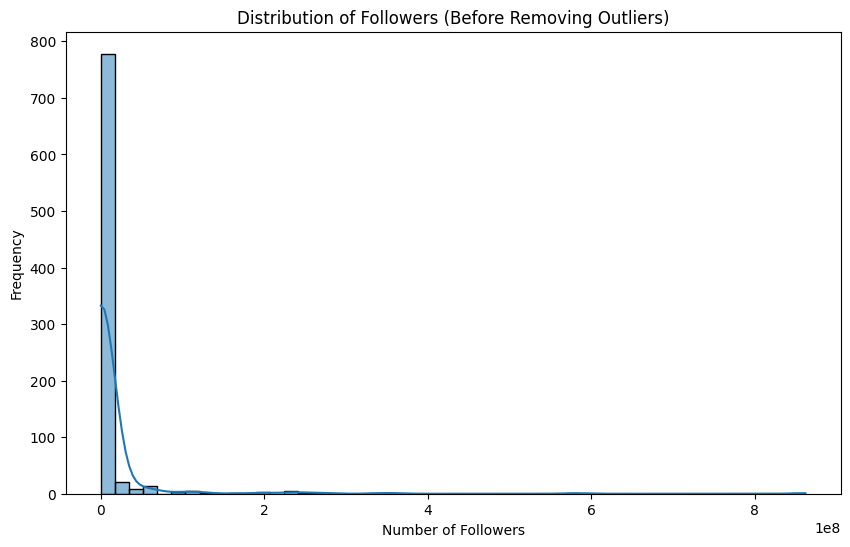

In [59]:
# Plot the distribution of followers before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=50, kde=True)
plt.title('Distribution of Followers (Before Removing Outliers)')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

In [60]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to check for outliers
num_cols = ['followers', 'following', 'engagement_ratio']

# Remove outliers for each numerical column
for col in num_cols:
    df = remove_outliers(df, col)

# Display the processed data
print(df.describe())

            followers    following         PVT                    date_joined  \
count      588.000000   588.000000  588.000000                            588   
mean    152510.459184   540.198980    0.161565  2018-08-22 11:45:18.367346944   
min          0.000000     1.000000    0.000000            2011-03-01 00:00:00   
25%        697.000000   165.000000    0.000000            2015-05-01 00:00:00   
50%       2815.500000   427.000000    0.000000            2018-11-01 00:00:00   
75%     201500.000000   808.500000    0.000000            2021-11-01 00:00:00   
max    1000000.000000  2010.000000    1.000000            2025-01-01 00:00:00   
std     247656.159551   463.252864    0.368364                            NaN   

       former_usernames  account_age  engagement_ratio  
count             588.0   588.000000        588.000000  
mean                1.0  2358.510204        361.624950  
min                 1.0    35.000000          0.000000  
25%                 1.0  1192.000000      

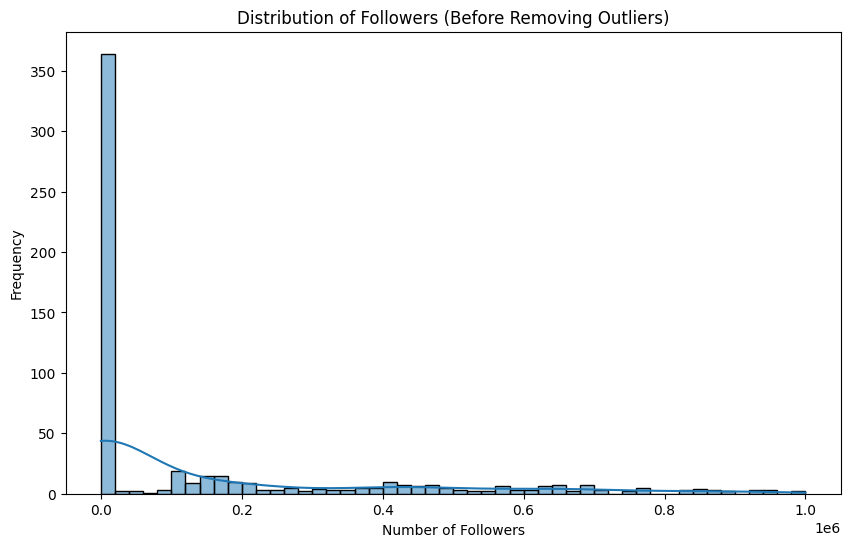

In [61]:
# Plot the distribution of followers before removing outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['followers'], bins=50, kde=True)
plt.title('Distribution of Followers (Before Removing Outliers)')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()